# Multi-species models 
```{contents} Table of Contents
:depth: 3
```

## Dengue 

For Dengue Fever, we'll follow work from this manuscript = [A model of dengue fever](https://pmc.ncbi.nlm.nih.gov/articles/PMC153427/).

We suppose that there exists in the system two species who can transfer the dengue virus to one another: human ($h$) and mosquitoes ($m$).
Mathematical models for multi-species often explore how manipulating the non-human animal population can reduce disease. 
This is for many reasons but one primary reason is that its very hard for humans to change their behaviors to prevent disease.

The model present for dengue assumes homogeneous mixing between both species. 

The dengue virus is passed from an infected mosquito to a human via a bite. 
To understand how the pathogen might be transmitted at the population level we should attempt to understand the probability of transmission when a human is bit and also the average number of bites per infected mosquito. 

The authors assume that infected mosquitoes bite one human per day $(b_{i} = 1)$, and that susceptible (not yet infected) mosquitoes bite 0.75 humans per day $(b_{s}=0.75)$.
There is evidence that infected mosquitoes do bite more frequently. 

There is also previous evidence that suggests the probability of transmission from humans to mosquitoes; $p_{h\to m}$; (and vice-versa; $p_{m\to h}$) is 0.75. 

Then the probability that a human is infected by a mosquito in a small interval of time $\Delta t$ is estimated for humans as 
\begin{align}
   p(\text{one human is infected}) =  1 - (1-p_{m\to h})^{b_{i} \times \frac{I_{m}}{N_{h}} \Delta t } \approx p_{m\to h} b_{i} \frac{I_{m}}{N_{h}} \Delta t
\end{align}

and so the average rate of infections among all susceptible humans is 

\begin{align}
   \Delta S  &= - S_{h} \times \left(p_{m\to h} b_{i}\right) \frac{I_{m}}{N_{h}} \Delta t \\ 
   \frac{\Delta S}{\Delta t} &= - S_{h} \left(p_{m\to h} b_{i}\right) \frac{I_{m}}{N_{h}} \\ 
   \frac{dS}{dt}&= - \beta_{m\to h} S_{h}  \frac{I_{m}}{N_{h}} \\ 
\end{align}

where we defined $\beta_{m \to h} = p_{m\to h} b_{i}$. 
We see that the rate at which susceptibles move to the infected state---called **the force of infection**---depends on how often infected mosquitoes bit, the probability of transmission when they do bite, and the number of mosquitoes per person $(\frac{I_{m}}{N_{h}})$. 

We can take a similar approach to define the change in infected humans and removed humans.
Because we are studying to species we also need to define the change in susceptible and infected mosquitoes. 

\begin{align}
\frac{dS_{h}}{dt} &= -\beta_{m \to h} S_{h} \frac{I_{m}}{N_{m}} \\  
\frac{dI_{h}}{dt} &= \beta_{m \to h} S_{h} \frac{I_{m}}{N_{m}} - \gamma I_{h}\\
\frac{dR_{h}}{dt} &= \gamma I_{h}
\end{align}

When a mosquito is infected with the dengue virus they never clear it. 
That is, mosquitoes are either susceptible or infected. 
Just like with the human population, we define the change in susceptible and infected mosquitoes as 

\begin{align}
    \frac{dS_{m}}{dt} &= -\beta_{h \to m} S_{m} \frac{I_{h}}{N_{h}}\\
    \frac{dI_{m}}{dt} &= \beta_{h \to m} S_{m} \frac{I_{h}}{N_{h}}
\end{align}

where the rate of movement from susceptible to infectious depends on the fraction of infected humans $\frac{I_{h}}{N_{h}}$.
Mosquitoes do not infect one another. They acquire an infection by, in this model, biting an infected human.

The full set of differential equations has five states

\begin{align}
%
\frac{dS_{h}}{dt} &= -\beta_{m \to h} S_{h} \frac{I_{m}}{N_{m}} \\  
\frac{dI_{h}}{dt} &= \beta_{m \to h} S_{h} \frac{I_{m}}{N_{m}} - \gamma I_{h}\\
\frac{dR_{h}}{dt} &= \gamma I_{h}\\
\\
%
\frac{dS_{m}}{dt} &= -\beta_{h \to m} S_{m} \frac{I_{h}}{N_{h}}\\
\frac{dI_{m}}{dt} &= \beta_{h \to m} S_{m} \frac{I_{h}}{N_{h}}
%
\end{align}

To complete our model specification we need initial conditions so each of the five states. 
The manuscript linked above suggests that a reasonable number of humans is 5000 and mosquitoes 50,000.
We will also use the same parameter values that were derived in the linked manuscript

| Name of the parameter                       | Notation | Base value            |
|---------------------------------------------|----------|-----------------------|
| Transmission probability of vector to human | $p_{hv}$      | 0.75                 |
| Transmission probability of human to vector | $p_{vh}$      | 0.75                 |
| Bites per susceptible mosquito per day      | $b_{s}$       | 0.5                  |
| Bites per infectious mosquito per day       | $b_{i}$       | 1.0                  |
| Effective contact rate, human to vector     | $\beta_{h \to m}$      | 0.375       |
| Effective contact rate, vector to human     | $\beta_{m \to h}$     | 0.75         |
| Human life span                             |  $1/\mu_{h}$              | 25000 days |
| Vector life span                            |  $1/\mu_{m}$             | 4 days      |
| Host infection duration                     |  $1/\gamma$              | 3 days      |


## Demography 

We need to add to our model one more important component---demographics. 
The lifespan of humans and mosquitoes is quite different. 
On average a human may live 65 years or so but mosquitoes typically live 4 days.  
To account for this, we need to model the birth and death of humans and mosquitoes (irrespective of disease state). 

We will assume that humans are born at a rate of $\mu_{h}$ and mosquitoes $\mu_{m}$.
Likewise, we will also assume both species die at that same rate. 
This is a simplifying assumption. 
Though species enter and exit the system the number of each species stays constant. 

Lets add birth and death process to the above system of equations:

\begin{align}
%
\frac{dS_{h}}{dt} &= \mu_{h}N_{h} -\beta_{m \to h} S_{h} \frac{I_{m}}{N_{m}} - \mu_{h}S \\  
\frac{dI_{h}}{dt} &= \beta_{m \to h} S_{h} \frac{I_{m}}{N_{m}} - \gamma I_{h} - \mu_{h}I\\
\frac{dR_{h}}{dt} &= \gamma I_{h} - \mu_{h}R\\
\\
%
\frac{dS_{m}}{dt} &= \mu_{m}N_{m} -\beta_{h \to m} S_{m} \frac{I_{h}}{N_{h}} - \mu_{m}S_{m} \\
\frac{dI_{m}}{dt} &= \beta_{h \to m} S_{m} \frac{I_{h}}{N_{h}} - \mu_{m}I_{m}
%
\end{align}


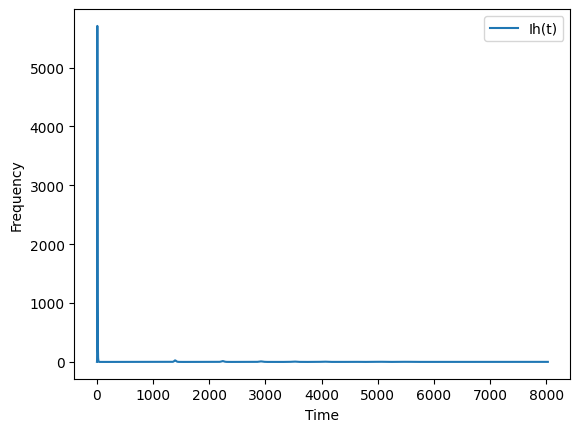

In [91]:
import numpy as np                     #--for array and matrix computations 
from scipy.integrate import solve_ivp  #--needed to solve the ODE system 
import matplotlib.pyplot as plt        #---for plotting 

def dengue(t,y
           ,beta__h2m
           ,beta__m2h
           ,gamma
           ,nh
           ,nm
           ,muh ):
    sh,ih,rh,  sm,im = y  #<- We assume that y holds state values s,i,r etc at each tiny time step

    dsh_dt =   muh*nh -beta__h2m*sh*(im/nh) - muh*sh
    dih_dt =           beta__h2m*sh*(im/nh) - gamma*ih
    drh_dt =   gamma*ih                     - muh*rh

    dsm_dt =   mum*nm -beta__m2h*sm*(ih/nh) - mum*sm      
    dim_dt =           beta__m2h*sm*(ih/nh) - mum*im

    #Its our job to compute the derivatives and return them as a list
    return [dsh_dt, dih_dt, drh_dt,  dsm_dt, dim_dt ] 

start = 0    #--start at time 0
end   = 8030   #--end   at time 200

beta__h2m = 0.75
beta__m2h = 0.375

gamma     = 1./3
muh       = 1./25000
mum       = 1./4

nh = 10*10**3
nm = 10*10**4

S0h = nh*(1-0.0001)
I0h = nh*0.0001
R0h = 0

S0m = nm*(1-0.0001)
I0m = nm*0.0001

initial_conditions = (S0h,I0h,R0h, S0m,I0m  )

solution = solve_ivp( fun     = dengue
                     , t_span = (start,end)
                     , y0     = initial_conditions
                     , args   = (beta__h2m,beta__m2h,gamma,nh,nm,muh) )

#--Extract solutions from the object called "solution"
times = solution.t
St_h    = solution.y[0,:] #<-first row  is S
It_h    = solution.y[1,:] #<-first row  is S
Rt_h    = solution.y[2,:] #<-first row  is S

St_m    = solution.y[3,:] #<-first row  is S
It_m    = solution.y[4,:] #<-first row  is S

#--plot the results
plt.plot(times,It_h, label = "Ih(t)")

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.legend()

Above is a plot of the number of human infections over 22 years (8030 days).
We see initially an intense rise in infections and then no more---or maybe not.
If we look closely, it seems like there may be smaller activity after the first year. 

Lets plot the number of infections after the first few years. 

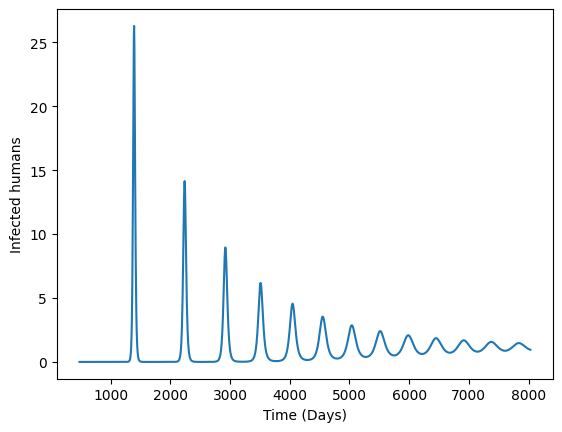

In [96]:
fig,ax = plt.subplots()
ax.plot(times[100:],It_h[100:])
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Infected humans")
plt.show()

Our model shows periodic spikes of infections in the human population that slowly die down over a decade. 
This is periodic behavior is a result of the different in lifespan between mosquitoes and humans. 
Humans are entering the system susceptible and present for a much longer time than mosquitoes.
This replenishment of susceptibles reaches a critical point where an outbreak occurs. 
Susceptibles are depleted and the process starts again. 

## Homework 

1. 

In [94]:
## 